In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [25]:
!git add .

In [26]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [27]:
!git commit -m "testing new deviation reward"

[main b926402] testing new deviation reward
 8 files changed, 517032 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (92%)
 rewrite gym-seb/gym_seb/envs/__pycache__/seb_env.cpython-37.pyc (63%)
 create mode 100644 models/random_model_ppo_v10.zip
 create mode 100644 models/real_model_ppo_v10.zip
 create mode 100644 ppo_cum_rewards_v10.csv
 create mode 100644 ppo_rewards_v10.csv


In [25]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [30]:
!git pull origin

Already up to date.


In [28]:
!git push origin

Counting objects: 16, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (16/16), done.
Writing objects: 100% (16/16), 7.16 MiB | 3.02 MiB/s, done.
Total 16 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/ahhuang007/Sebastian.git
   e7f444c..b926402  main -> main


Installing stable_baselines since it might be better

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks


In [4]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 5.4 MB/s 


Installing my custom environment

In [6]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [31]:
%cd gym-seb

/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [32]:
!pip install -e .

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/Sebastian/gym-seb
  Attempting uninstall: gym-seb
    Found existing installation: gym-seb 0.0.5
    Can't uninstall 'gym-seb'. No files were found to uninstall.
  Running setup.py develop for gym-seb


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


In [5]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [6]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
env.seed(4)
env.action_space.seed(4)
env.observation_space.seed(4)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
from stable_baselines3.common.callbacks import BaseCallback

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, li2, li3, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
    self.li2 = li2
    self.cum_reward = 0
    self.li3 = li3
  def _on_step(self) -> bool:
    self.li.append(self.locals['rewards'][0])
    self.li3[0].append(self.locals['infos'][0]['f_reward'])
    self.li3[1].append(self.locals['infos'][0]['d_reward'])
    self.li3[2].append(self.locals['infos'][0]['p_reward'])
    self.li3[3].append(self.locals['infos'][0]['y_reward'])
    self.li3[4].append(self.locals['infos'][0]['c_reward'])
    if self.locals['dones'][0] == False:
      self.cum_reward += self.locals['rewards'][0]
    else:
      self.li2.append(self.cum_reward)
      self.cum_reward = self.locals['rewards'][0]

In [8]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 83
resetting environment
robot has flipped over at timestep 255
resetting environment
robot has flipped over at timestep 430
resetting environment
robot has flipped over at timestep 540
resetting environment
robot has flipped over at timestep 710
resetting environment
robot has flipped over at timestep 888
resetting environment
robot has flipped over at timestep 966
resetting environment
robot has flipped over at timestep 1091
resetting environment
robot has flipped over at timestep 1138
resetting environment
robot has flipped over at timestep 1204
resetting environment
mean_reward=-83.74 +/- 52.00981994028646


In [9]:
model.save("models/random_model_ppo_v11")

In [ ]:
#In case I want to load a previously trained model for more training
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
cum_data = []
rewards_data = [[],[],[],[],[]]
record = Recorder(data, cum_data, rewards_data, log_dir = "/")

In [21]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v11")

resetting environment
resetting environment
robot has flipped over at timestep 403375
resetting environment
robot has flipped over at timestep 403476
resetting environment
robot has flipped over at timestep 403633
resetting environment
robot has flipped over at timestep 403911
resetting environment
robot has flipped over at timestep 404204
resetting environment
robot has flipped over at timestep 404325
resetting environment
robot has flipped over at timestep 404593
resetting environment
robot has flipped over at timestep 404923
resetting environment
robot has flipped over at timestep 405271
resetting environment
robot has flipped over at timestep 405377
resetting environment
robot has flipped over at timestep 406060
resetting environment
robot has flipped over at timestep 406205
resetting environment
robot has flipped over at timestep 406423
resetting environment
robot has flipped over at timestep 406510
resetting environment
robot has flipped over at timestep 406672
resetting environm

In [22]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 503053
resetting environment
robot has flipped over at timestep 503806
resetting environment
robot has flipped over at timestep 503976
resetting environment
robot has flipped over at timestep 504059
resetting environment
robot has flipped over at timestep 504125
resetting environment
robot has flipped over at timestep 504216
resetting environment
robot has flipped over at timestep 504341
resetting environment
robot has flipped over at timestep 504458
resetting environment
robot has flipped over at timestep 504682
resetting environment
robot has flipped over at timestep 504947
resetting environment
mean_reward=-0.20 +/- 80.13737561293446


Plotting

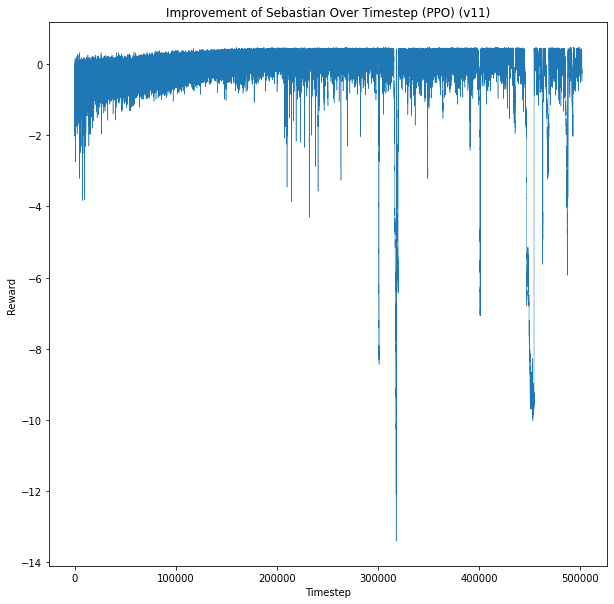

In [23]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Timestep (PPO) (v11)")
plt.show()

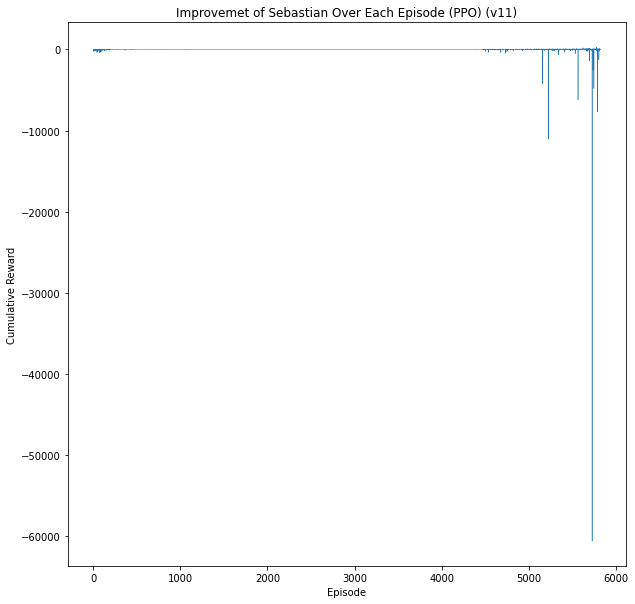

In [24]:
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(cum_data) + 1)
plt.plot(xs, cum_data, linewidth = 0.5)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Improvemet of Sebastian Over Each Episode (PPO) (v11)")
plt.show()

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

In [ ]:
#Testing TD3
from stable_baselines3 import TD3
td3_model = TD3('MlpPolicy', env, verbose = 1)
td3_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken

Some testing we did on TD3 (an upgraded version of DDPG), it takes so long to train that it doesn't seem worth looking into.

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(td3_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 1114318
resetting environment
at episode 1120000
-1.541983962059021
maximum timestep reached for episode
resetting environment
at episode 1130000
-1.4691083431243896
maximum timestep reached for episode
resetting environment
at episode 1140000
-2.7713000774383545
maximum timestep reached for episode
resetting environment
at episode 1150000
-1.830146312713623
maximum timestep reached for episode
resetting environment
at episode 1160000
-1.852158546447754
maximum timestep reached for episode
resetting environment
at episode 1170000
-0.8908807039260864
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 1174587
resetting environment
robot has flipped over at timestep 1176486
resetting environment
robot has flipped over at timestep 1176766
resetting environment
mean_reward=-11838.14 +/- 8694.458009957501


In [ ]:
td3_model.save("random_model_td3")

In [ ]:
td3_model = TD3.load("real_model_td3", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
class TD3Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(TD3Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['episode_reward'])


In [ ]:
data2 = []
record = TD3Recorder(data2, log_dir = "/")

In [ ]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

td3_model = td3_model.learn(total_timesteps = 100000, log_interval = 100, callback = record)
td3_model.save("real_model_td3")

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [25]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data, "f_reward":rewards_data[0], 
                          "d_reward":rewards_data[1], "p_reward":rewards_data[2], 
                          "y_reward":rewards_data[3], "c_reward":rewards_data[4]})
df2 = pd.DataFrame(data = {"episode":range(1, len(cum_data) + 1), "cumulative reward": cum_data})

In [ ]:
df.to_csv("./data/timestep_rewards/ppo_rewards_v10.csv")
df2.to_csv("./data/episode_rewards/ppo_cum_rewards_v10.csv")